In [21]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from datetime import date, timedelta

In [37]:
df1 = pd.read_csv("Predictions\Open Price Prediction.csv")
df2 = pd.read_csv("Predictions\High Price Prediction.csv")
df3 = pd.read_csv("Predictions\Low Price Prediction.csv")
df4 = pd.read_csv("Predictions\Close Price Prediction.csv")

original_df = pd.read_csv("dataset (MSFT).csv")

df = pd.concat([df1, df2, df3, df4], axis=1)
print("Number of rows and columns:", df.shape)
df.tail(20)

Number of rows and columns: (2333, 4)


,Open,High,Low,Close
2313,230.99556,231.45380,230.77464,230.04018
2314,231.00122,231.43726,230.78886,230.02988
2315,230.97928,231.40758,230.77448,229.99214
2316,230.92430,231.36057,230.72285,229.93149
2317,230.95305,231.38630,230.74635,229.95550
2318,230.94061,231.37491,230.73154,229.94392
2319,231.00873,231.43938,230.78963,230.01222
2320,230.86769,231.32074,230.65181,229.88654
2321,230.87318,231.33075,230.64856,229.89800
2322,230.71930,231.18670,230.50151,229.75221


In [32]:
df = df.tail(100)
# print(df)

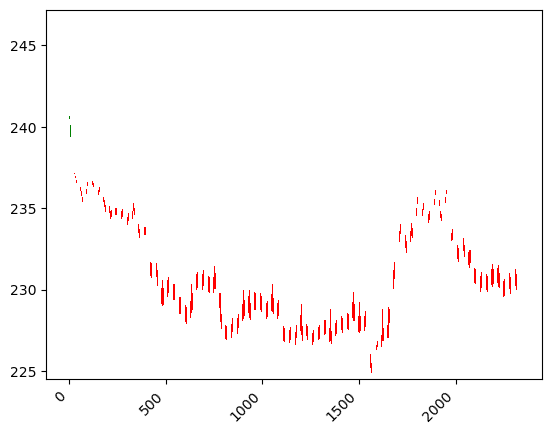

In [36]:
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = df[df.Close>=df.Open]
down = df[df.Close<df.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

In [48]:
predicted_arr, actual_arr = [], []
predicted_open = df['Open'].tolist()[-100:]
predicted_close = df['Close'].tolist()[-100:]
for o, c in zip(predicted_open, predicted_close):
    predicted_arr.append(o - c)
    
# predicted_arr

In [49]:
actual_open = original_df['Open'].tolist()[-100:]
actual_close = original_df['Close'].tolist()[-100:]
for o, c in zip(actual_open, actual_close):
    actual_arr.append(o - c)
    
# actual_arr

In [50]:
accuracy_counter = 0
for predicted, actual in zip(predicted_arr, actual_arr):
    if predicted >= 0 and actual >= 0:
        accuracy_counter += 1
        
accuracy_counter / 100

0.47